In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-06 11:35:59.549354


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1117.7324)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 16


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.2621)tensor(6.6452)tensor(4.1889)tensor(4.0862)tensor(3.3755)tensor(2.7698)tensor(6.5936)tensor(3.2533)tensor(3.3771)tensor(3.4203)tensor(5.7446)tensor(3.0737)tensor(3.4739)tensor(4.3558)tensor(3.6484)tensor(3.9607)tensor(5.9470)tensor(2.9305)tensor(3.2794)tensor(4.2455)tensor(8.7165)tensor(4.2930)tensor(5.9799)tensor(4.4537)tensor(6.8111)tensor(7.1291)tensor(4.4072)tensor(6.3866)tensor(6.6811)tensor(5.8703)tensor(6.8926)tensor(6.8138)tensor(7.6306)tensor(6.1779)tensor(4.2049)tensor(3.1644)tensor(6.6341)tensor(7.5226)tensor(4.4436)tensor(5.5293)tensor(3.0883)tensor(4.7125)tensor(6.6783)tensor(3.1289)tensor(4.6613)tensor(3.5377)tensor(8.9644)tensor(7.9587)tensor(9.2126)tensor(6.8526)tensor(2.8375)tensor(4.4210)tensor(5.1315)tensor(3.2673)tensor(6.2493)tensor(4.3685)tensor(4.5393)tensor(4.5347)tensor(6.2648)tensor(6.9790)tensor(3.1334)tensor(4.9115)tensor(5.6589)tensor(7.2076)tensor(6.1101)tensor(3.6263)tensor(3.1899)tensor(3.4396)tensor(3.2112)tensor(5.3168)tensor(3.1958)tensor

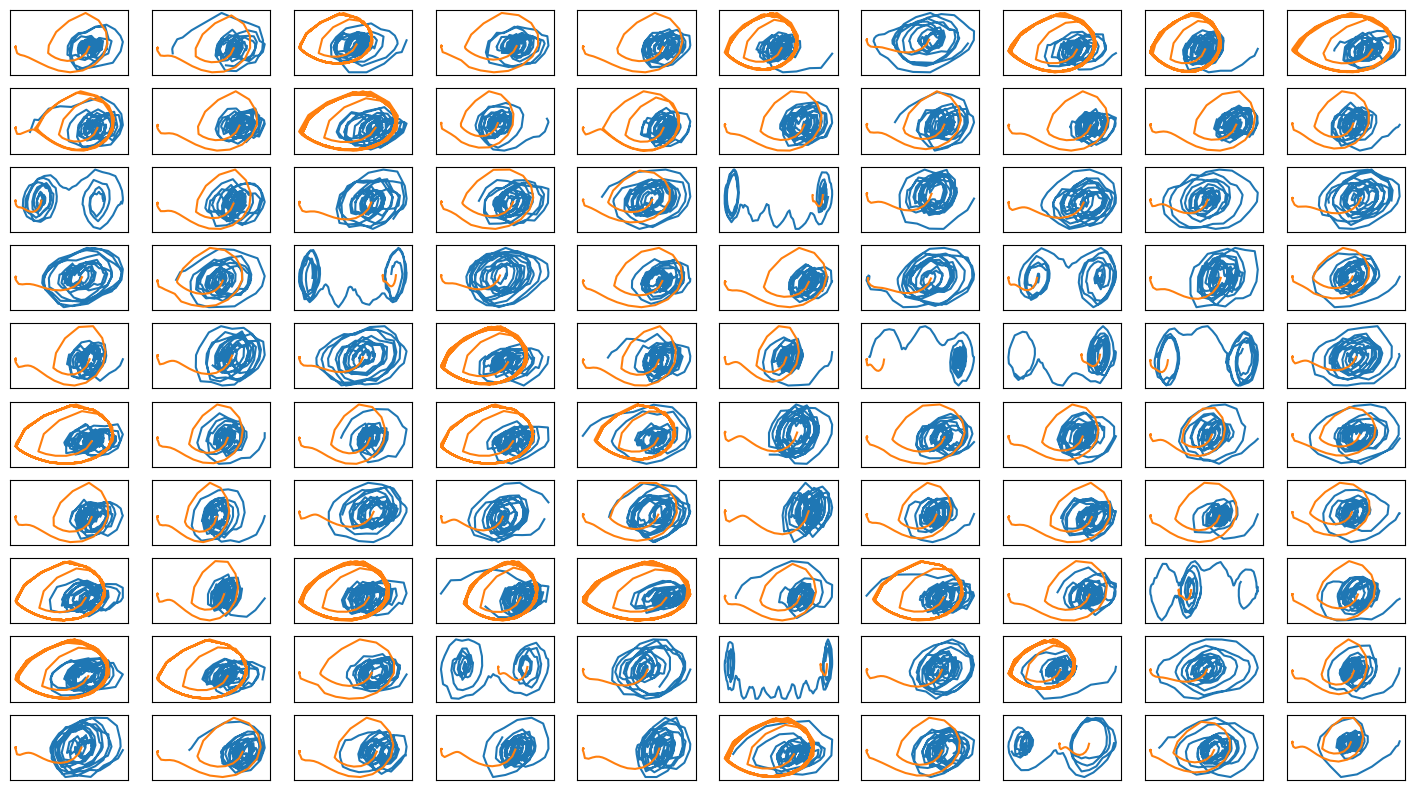

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 13211.22205  validloss 467.73121±0.00000  bestvalidloss 467.73121  last_update 0
train: iter 1  trainloss 5260.26468  validloss 374.89929±0.00000  bestvalidloss 374.89929  last_update 0
train: iter 2  trainloss 4507.18151  validloss 333.20140±0.00000  bestvalidloss 333.20140  last_update 0
train: iter 3  trainloss 3080.72090  validloss 302.59693±0.00000  bestvalidloss 302.59693  last_update 0
train: iter 4  trainloss 3483.62774  validloss 272.58134±0.00000  bestvalidloss 272.58134  last_update 0
train: iter 5  trainloss 2219.38779  validloss 249.73247±0.00000  bestvalidloss 249.73247  last_update 0
train: iter 6  trainloss 1717.23145  validloss 287.31586±0.00000  bestvalidloss 249.73247  last_update 1
train: iter 7  trainloss 1168.06793  validloss 266.83599±0.00000  bestvalidloss 249.73247  last_update 2
train: iter 8  trainloss 1022.29678  validloss 231.65922±0.00000  bestvalidloss 231.65922  last_update 0
train: iter 9  trainloss 901.10107 

train: iter 77  trainloss -410.31887  validloss -522.29683±0.00000  bestvalidloss -564.03173  last_update 1
train: iter 78  trainloss -418.22598  validloss -534.84042±0.00000  bestvalidloss -564.03173  last_update 2
train: iter 79  trainloss -424.57913  validloss -582.93961±0.00000  bestvalidloss -582.93961  last_update 0
train: iter 80  trainloss -432.51146  validloss -567.71405±0.00000  bestvalidloss -582.93961  last_update 1
train: iter 81  trainloss -430.37013  validloss -599.18270±0.00000  bestvalidloss -599.18270  last_update 0
train: iter 82  trainloss -436.92257  validloss -578.40449±0.00000  bestvalidloss -599.18270  last_update 1
train: iter 83  trainloss -437.35476  validloss -611.92228±0.00000  bestvalidloss -611.92228  last_update 0
train: iter 84  trainloss -448.36904  validloss -612.19024±0.00000  bestvalidloss -612.19024  last_update 0
train: iter 85  trainloss -454.73056  validloss -603.16301±0.00000  bestvalidloss -612.19024  last_update 1
train: iter 86  trainloss -4

train: iter 153  trainloss -586.10826  validloss -745.99303±0.00000  bestvalidloss -753.38219  last_update 4
train: iter 154  trainloss -593.75349  validloss -718.47650±0.00000  bestvalidloss -753.38219  last_update 5
train: iter 155  trainloss -592.20659  validloss -745.86996±0.00000  bestvalidloss -753.38219  last_update 6
train: iter 156  trainloss -573.25676  validloss -680.25091±0.00000  bestvalidloss -753.38219  last_update 7
train: iter 157  trainloss -598.99661  validloss -737.32207±0.00000  bestvalidloss -753.38219  last_update 8
train: iter 158  trainloss -600.58704  validloss -725.41321±0.00000  bestvalidloss -753.38219  last_update 9
train: iter 159  trainloss -599.51926  validloss -759.77115±0.00000  bestvalidloss -759.77115  last_update 0
train: iter 160  trainloss -597.69415  validloss -738.80965±0.00000  bestvalidloss -759.77115  last_update 1
train: iter 161  trainloss -590.78194  validloss -747.19281±0.00000  bestvalidloss -759.77115  last_update 2
train: iter 162  tr

train: iter 228  trainloss -627.78455  validloss -757.08880±0.00000  bestvalidloss -790.62464  last_update 11
train: iter 229  trainloss -627.56577  validloss -767.61429±0.00000  bestvalidloss -790.62464  last_update 12
train: iter 230  trainloss -626.30947  validloss -775.89388±0.00000  bestvalidloss -790.62464  last_update 13
train: iter 231  trainloss -623.49566  validloss -745.94706±0.00000  bestvalidloss -790.62464  last_update 14
train: iter 232  trainloss -620.33444  validloss -780.53671±0.00000  bestvalidloss -790.62464  last_update 15
train: iter 233  trainloss -627.29757  validloss -770.22337±0.00000  bestvalidloss -790.62464  last_update 16
train: iter 234  trainloss -607.77329  validloss -775.19654±0.00000  bestvalidloss -790.62464  last_update 17
train: iter 235  trainloss -616.99622  validloss -770.28139±0.00000  bestvalidloss -790.62464  last_update 18
train: iter 236  trainloss -584.58538  validloss -735.48759±0.00000  bestvalidloss -790.62464  last_update 19
train: ite

train: iter 304  trainloss -635.19461  validloss -813.89435±0.00000  bestvalidloss -814.96606  last_update 22
train: iter 305  trainloss -639.72398  validloss -791.88645±0.00000  bestvalidloss -814.96606  last_update 23
train: iter 306  trainloss -644.71881  validloss -809.43696±0.00000  bestvalidloss -814.96606  last_update 24
train: iter 307  trainloss -618.59475  validloss -807.07372±0.00000  bestvalidloss -814.96606  last_update 25
train: iter 308  trainloss -578.22147  validloss -677.42150±0.00000  bestvalidloss -814.96606  last_update 26
train: iter 309  trainloss -639.71815  validloss -801.95629±0.00000  bestvalidloss -814.96606  last_update 27
train: iter 310  trainloss -630.21752  validloss -803.19435±0.00000  bestvalidloss -814.96606  last_update 28
train: iter 311  trainloss -634.17492  validloss -818.61029±0.00000  bestvalidloss -818.61029  last_update 0
train: iter 312  trainloss -628.94296  validloss -807.62070±0.00000  bestvalidloss -818.61029  last_update 1
train: iter 

train: iter 380  trainloss -655.50033  validloss -829.60323±0.00000  bestvalidloss -838.37139  last_update 1
train: iter 381  trainloss -635.26454  validloss -805.38275±0.00000  bestvalidloss -838.37139  last_update 2
train: iter 382  trainloss -653.14430  validloss -799.38612±0.00000  bestvalidloss -838.37139  last_update 3
train: iter 383  trainloss -613.61727  validloss -770.99563±0.00000  bestvalidloss -838.37139  last_update 4
train: iter 384  trainloss -656.81481  validloss -803.52515±0.00000  bestvalidloss -838.37139  last_update 5
train: iter 385  trainloss -651.85719  validloss -805.58621±0.00000  bestvalidloss -838.37139  last_update 6
train: iter 386  trainloss -651.82632  validloss -828.48257±0.00000  bestvalidloss -838.37139  last_update 7
train: iter 387  trainloss -653.75166  validloss -812.52361±0.00000  bestvalidloss -838.37139  last_update 8
train: iter 388  trainloss -652.79193  validloss -829.17625±0.00000  bestvalidloss -838.37139  last_update 9
train: iter 389  tr

train: iter 455  trainloss -661.04017  validloss -838.68440±0.00000  bestvalidloss -848.27871  last_update 8
train: iter 456  trainloss -653.15830  validloss -837.78359±0.00000  bestvalidloss -848.27871  last_update 9
train: iter 457  trainloss -651.53759  validloss -821.12914±0.00000  bestvalidloss -848.27871  last_update 10
train: iter 458  trainloss -648.75236  validloss -739.87939±0.00000  bestvalidloss -848.27871  last_update 11
train: iter 459  trainloss -669.65742  validloss -837.03126±0.00000  bestvalidloss -848.27871  last_update 12
train: iter 460  trainloss -670.01400  validloss -833.83221±0.00000  bestvalidloss -848.27871  last_update 13
train: iter 461  trainloss -657.42967  validloss -833.50150±0.00000  bestvalidloss -848.27871  last_update 14
train: iter 462  trainloss -662.34706  validloss -847.25393±0.00000  bestvalidloss -848.27871  last_update 15
train: iter 463  trainloss -665.59162  validloss -770.03574±0.00000  bestvalidloss -848.27871  last_update 16
train: iter 

train: iter 530  trainloss -669.82491  validloss -832.23945±0.00000  bestvalidloss -859.05480  last_update 18
train: iter 531  trainloss -665.10534  validloss -865.39152±0.00000  bestvalidloss -865.39152  last_update 0
train: iter 532  trainloss -667.75506  validloss -798.26083±0.00000  bestvalidloss -865.39152  last_update 1
train: iter 533  trainloss -672.63773  validloss -839.45134±0.00000  bestvalidloss -865.39152  last_update 2
train: iter 534  trainloss -668.62224  validloss -819.04899±0.00000  bestvalidloss -865.39152  last_update 3
train: iter 535  trainloss -655.93893  validloss -833.07920±0.00000  bestvalidloss -865.39152  last_update 4
train: iter 536  trainloss -648.95235  validloss -826.67120±0.00000  bestvalidloss -865.39152  last_update 5
train: iter 537  trainloss -663.07013  validloss -792.08929±0.00000  bestvalidloss -865.39152  last_update 6
train: iter 538  trainloss -655.34754  validloss -856.67040±0.00000  bestvalidloss -865.39152  last_update 7
train: iter 539  t

train: iter 605  trainloss -664.89100  validloss -828.29260±0.00000  bestvalidloss -868.82704  last_update 18
train: iter 606  trainloss -660.05925  validloss -846.15419±0.00000  bestvalidloss -868.82704  last_update 19
train: iter 607  trainloss -664.12154  validloss -853.00448±0.00000  bestvalidloss -868.82704  last_update 20
train: iter 608  trainloss -666.38666  validloss -846.29834±0.00000  bestvalidloss -868.82704  last_update 21
train: iter 609  trainloss -677.54222  validloss -850.66337±0.00000  bestvalidloss -868.82704  last_update 22
train: iter 610  trainloss -675.35144  validloss -854.33667±0.00000  bestvalidloss -868.82704  last_update 23
train: iter 611  trainloss -667.75324  validloss -752.72908±0.00000  bestvalidloss -868.82704  last_update 24
train: iter 612  trainloss -674.21588  validloss -851.70736±0.00000  bestvalidloss -868.82704  last_update 25
train: iter 613  trainloss -675.35036  validloss -859.15586±0.00000  bestvalidloss -868.82704  last_update 26
train: ite

train: iter 680  trainloss -667.13124  validloss -845.61133±0.00000  bestvalidloss -868.82704  last_update 93
train: iter 681  trainloss -643.22423  validloss -823.73202±0.00000  bestvalidloss -868.82704  last_update 94
train: iter 682  trainloss -670.05885  validloss -855.93675±0.00000  bestvalidloss -868.82704  last_update 95
train: iter 683  trainloss -673.78195  validloss -849.25617±0.00000  bestvalidloss -868.82704  last_update 96
train: iter 684  trainloss -680.07667  validloss -849.71484±0.00000  bestvalidloss -868.82704  last_update 97
train: iter 685  trainloss -676.16688  validloss -869.00275±0.00000  bestvalidloss -869.00275  last_update 0
train: iter 686  trainloss -672.82191  validloss -830.83588±0.00000  bestvalidloss -869.00275  last_update 1
train: iter 687  trainloss -682.59292  validloss -845.41216±0.00000  bestvalidloss -869.00275  last_update 2
train: iter 688  trainloss -674.15011  validloss -862.13628±0.00000  bestvalidloss -869.00275  last_update 3
train: iter 68

train: iter 755  trainloss -669.25266  validloss -830.35380±0.00000  bestvalidloss -875.34039  last_update 52
train: iter 756  trainloss -680.11228  validloss -856.74380±0.00000  bestvalidloss -875.34039  last_update 53
train: iter 757  trainloss -683.65711  validloss -875.68359±0.00000  bestvalidloss -875.68359  last_update 0
train: iter 758  trainloss -675.21275  validloss -852.73966±0.00000  bestvalidloss -875.68359  last_update 1
train: iter 759  trainloss -675.26854  validloss -828.63295±0.00000  bestvalidloss -875.68359  last_update 2
train: iter 760  trainloss -673.38275  validloss -841.05687±0.00000  bestvalidloss -875.68359  last_update 3
train: iter 761  trainloss -660.38445  validloss -610.85365±0.00000  bestvalidloss -875.68359  last_update 4
train: iter 762  trainloss -677.08250  validloss -854.30079±0.00000  bestvalidloss -875.68359  last_update 5
train: iter 763  trainloss -668.13520  validloss -871.68716±0.00000  bestvalidloss -875.68359  last_update 6
train: iter 764  

train: iter 830  trainloss -685.11553  validloss -842.74650±0.00000  bestvalidloss -875.68359  last_update 73
train: iter 831  trainloss -684.57840  validloss -872.74647±0.00000  bestvalidloss -875.68359  last_update 74
train: iter 832  trainloss -691.15253  validloss -877.37538±0.00000  bestvalidloss -877.37538  last_update 0
train: iter 833  trainloss -681.96502  validloss -829.98277±0.00000  bestvalidloss -877.37538  last_update 1
train: iter 834  trainloss -683.92503  validloss -827.10847±0.00000  bestvalidloss -877.37538  last_update 2
train: iter 835  trainloss -684.30039  validloss -846.28316±0.00000  bestvalidloss -877.37538  last_update 3
train: iter 836  trainloss -686.82498  validloss -817.47562±0.00000  bestvalidloss -877.37538  last_update 4
train: iter 837  trainloss -689.91913  validloss -864.51984±0.00000  bestvalidloss -877.37538  last_update 5
train: iter 838  trainloss -684.80225  validloss -868.47038±0.00000  bestvalidloss -877.37538  last_update 6
train: iter 839  

train: iter 905  trainloss -694.60216  validloss -864.05314±0.00000  bestvalidloss -880.96426  last_update 5
train: iter 906  trainloss -688.03373  validloss -862.96543±0.00000  bestvalidloss -880.96426  last_update 6
train: iter 907  trainloss -687.16042  validloss -847.24055±0.00000  bestvalidloss -880.96426  last_update 7
train: iter 908  trainloss -687.27213  validloss -830.52140±0.00000  bestvalidloss -880.96426  last_update 8
train: iter 909  trainloss -689.92671  validloss -815.25743±0.00000  bestvalidloss -880.96426  last_update 9
train: iter 910  trainloss -688.48760  validloss -862.68180±0.00000  bestvalidloss -880.96426  last_update 10
train: iter 911  trainloss -681.93644  validloss -874.06555±0.00000  bestvalidloss -880.96426  last_update 11
train: iter 912  trainloss -692.30922  validloss -878.43629±0.00000  bestvalidloss -880.96426  last_update 12
train: iter 913  trainloss -685.05249  validloss -862.39865±0.00000  bestvalidloss -880.96426  last_update 13
train: iter 914

train: iter 980  trainloss -699.01445  validloss -859.67774±0.00000  bestvalidloss -881.98497  last_update 39
train: iter 981  trainloss -696.50720  validloss -865.19985±0.00000  bestvalidloss -881.98497  last_update 40
train: iter 982  trainloss -691.28786  validloss -852.28743±0.00000  bestvalidloss -881.98497  last_update 41
train: iter 983  trainloss -693.81010  validloss -869.72691±0.00000  bestvalidloss -881.98497  last_update 42
train: iter 984  trainloss -683.21020  validloss -685.01780±0.00000  bestvalidloss -881.98497  last_update 43
train: iter 985  trainloss -688.25540  validloss -864.65163±0.00000  bestvalidloss -881.98497  last_update 44
train: iter 986  trainloss -683.91294  validloss -814.19710±0.00000  bestvalidloss -881.98497  last_update 45
train: iter 987  trainloss -691.74389  validloss -845.88242±0.00000  bestvalidloss -881.98497  last_update 46
train: iter 988  trainloss -690.37088  validloss -854.61941±0.00000  bestvalidloss -881.98497  last_update 47
train: ite

train: iter 1055  trainloss -699.90087  validloss -869.34131±0.00000  bestvalidloss -883.20378  last_update 14
train: iter 1056  trainloss -691.34376  validloss -875.94607±0.00000  bestvalidloss -883.20378  last_update 15
train: iter 1057  trainloss -702.36565  validloss -875.23829±0.00000  bestvalidloss -883.20378  last_update 16
train: iter 1058  trainloss -701.41752  validloss -845.40364±0.00000  bestvalidloss -883.20378  last_update 17
train: iter 1059  trainloss -690.41143  validloss -860.49510±0.00000  bestvalidloss -883.20378  last_update 18
train: iter 1060  trainloss -696.98969  validloss -862.26676±0.00000  bestvalidloss -883.20378  last_update 19
train: iter 1061  trainloss -693.17310  validloss -881.07538±0.00000  bestvalidloss -883.20378  last_update 20
train: iter 1062  trainloss -704.04322  validloss -856.04287±0.00000  bestvalidloss -883.20378  last_update 21
train: iter 1063  trainloss -706.50870  validloss -850.14970±0.00000  bestvalidloss -883.20378  last_update 22
t

train: iter 1129  trainloss -715.70680  validloss -860.67584±0.00000  bestvalidloss -892.52754  last_update 11
train: iter 1130  trainloss -710.06280  validloss -888.42919±0.00000  bestvalidloss -892.52754  last_update 12
train: iter 1131  trainloss -707.53563  validloss -866.34774±0.00000  bestvalidloss -892.52754  last_update 13
train: iter 1132  trainloss -711.20164  validloss -885.33861±0.00000  bestvalidloss -892.52754  last_update 14
train: iter 1133  trainloss -713.92653  validloss -861.91547±0.00000  bestvalidloss -892.52754  last_update 15
train: iter 1134  trainloss -715.00448  validloss -875.73357±0.00000  bestvalidloss -892.52754  last_update 16
train: iter 1135  trainloss -720.06492  validloss -870.60006±0.00000  bestvalidloss -892.52754  last_update 17
train: iter 1136  trainloss -721.85303  validloss -869.65924±0.00000  bestvalidloss -892.52754  last_update 18
train: iter 1137  trainloss -717.45343  validloss -879.16959±0.00000  bestvalidloss -892.52754  last_update 19
t

train: iter 1203  trainloss -733.74129  validloss -862.67618±0.00000  bestvalidloss -895.62269  last_update 23
train: iter 1204  trainloss -727.52423  validloss -873.45047±0.00000  bestvalidloss -895.62269  last_update 24
train: iter 1205  trainloss -730.92402  validloss -866.38598±0.00000  bestvalidloss -895.62269  last_update 25
train: iter 1206  trainloss -728.86140  validloss -880.81432±0.00000  bestvalidloss -895.62269  last_update 26
train: iter 1207  trainloss -732.99668  validloss -888.73370±0.00000  bestvalidloss -895.62269  last_update 27
train: iter 1208  trainloss -724.82700  validloss -799.14836±0.00000  bestvalidloss -895.62269  last_update 28
train: iter 1209  trainloss -739.89834  validloss -881.83456±0.00000  bestvalidloss -895.62269  last_update 29
train: iter 1210  trainloss -734.29785  validloss -871.71093±0.00000  bestvalidloss -895.62269  last_update 30
train: iter 1211  trainloss -729.95290  validloss -857.90147±0.00000  bestvalidloss -895.62269  last_update 31
t

train: iter 1277  trainloss -738.95577  validloss -842.79474±0.00000  bestvalidloss -898.56553  last_update 20
train: iter 1278  trainloss -734.60906  validloss -897.94061±0.00000  bestvalidloss -898.56553  last_update 21
train: iter 1279  trainloss -739.46293  validloss -874.40735±0.00000  bestvalidloss -898.56553  last_update 22
train: iter 1280  trainloss -741.06349  validloss -894.66337±0.00000  bestvalidloss -898.56553  last_update 23
train: iter 1281  trainloss -729.38918  validloss -852.45993±0.00000  bestvalidloss -898.56553  last_update 24
train: iter 1282  trainloss -732.61657  validloss -883.97798±0.00000  bestvalidloss -898.56553  last_update 25
train: iter 1283  trainloss -736.45682  validloss -890.44999±0.00000  bestvalidloss -898.56553  last_update 26
train: iter 1284  trainloss -731.45569  validloss -878.11100±0.00000  bestvalidloss -898.56553  last_update 27
train: iter 1285  trainloss -741.45562  validloss -860.80533±0.00000  bestvalidloss -898.56553  last_update 28
t

train: iter 1351  trainloss -748.14081  validloss -866.41133±0.00000  bestvalidloss -909.65979  last_update 4
train: iter 1352  trainloss -747.77159  validloss -894.81699±0.00000  bestvalidloss -909.65979  last_update 5
train: iter 1353  trainloss -739.75674  validloss -883.82113±0.00000  bestvalidloss -909.65979  last_update 6
train: iter 1354  trainloss -748.07931  validloss -885.23755±0.00000  bestvalidloss -909.65979  last_update 7
train: iter 1355  trainloss -747.45722  validloss -862.79260±0.00000  bestvalidloss -909.65979  last_update 8
train: iter 1356  trainloss -744.59880  validloss -855.16696±0.00000  bestvalidloss -909.65979  last_update 9
train: iter 1357  trainloss -746.17412  validloss -897.78510±0.00000  bestvalidloss -909.65979  last_update 10
train: iter 1358  trainloss -745.71052  validloss -858.71096±0.00000  bestvalidloss -909.65979  last_update 11
train: iter 1359  trainloss -742.60869  validloss -885.59388±0.00000  bestvalidloss -909.65979  last_update 12
train: 

train: iter 1426  trainloss -759.72750  validloss -905.20569±0.00000  bestvalidloss -929.61494  last_update 6
train: iter 1427  trainloss -760.69407  validloss -924.44320±0.00000  bestvalidloss -929.61494  last_update 7
train: iter 1428  trainloss -766.64429  validloss -909.09561±0.00000  bestvalidloss -929.61494  last_update 8
train: iter 1429  trainloss -765.98735  validloss -928.01160±0.00000  bestvalidloss -929.61494  last_update 9
train: iter 1430  trainloss -767.83280  validloss -926.15914±0.00000  bestvalidloss -929.61494  last_update 10
train: iter 1431  trainloss -752.02035  validloss -911.91288±0.00000  bestvalidloss -929.61494  last_update 11
train: iter 1432  trainloss -764.58552  validloss -907.75578±0.00000  bestvalidloss -929.61494  last_update 12
train: iter 1433  trainloss -765.63965  validloss -920.19639±0.00000  bestvalidloss -929.61494  last_update 13
train: iter 1434  trainloss -766.10896  validloss -888.20854±0.00000  bestvalidloss -929.61494  last_update 14
train

train: iter 1501  trainloss -771.22765  validloss -839.11937±0.00000  bestvalidloss -944.38947  last_update 15
train: iter 1502  trainloss -751.12856  validloss -931.96627±0.00000  bestvalidloss -944.38947  last_update 16
train: iter 1503  trainloss -780.52655  validloss -944.41360±0.00000  bestvalidloss -944.41360  last_update 0
train: iter 1504  trainloss -787.25701  validloss -952.50401±0.00000  bestvalidloss -952.50401  last_update 0
train: iter 1505  trainloss -780.50550  validloss -945.87744±0.00000  bestvalidloss -952.50401  last_update 1
train: iter 1506  trainloss -788.33708  validloss -907.84496±0.00000  bestvalidloss -952.50401  last_update 2
train: iter 1507  trainloss -769.22866  validloss -934.56808±0.00000  bestvalidloss -952.50401  last_update 3
train: iter 1508  trainloss -777.76898  validloss -932.29159±0.00000  bestvalidloss -952.50401  last_update 4
train: iter 1509  trainloss -778.14483  validloss -942.70335±0.00000  bestvalidloss -952.50401  last_update 5
train: i

train: iter 1576  trainloss -792.00764  validloss -932.89764±0.00000  bestvalidloss -962.37649  last_update 1
train: iter 1577  trainloss -798.62455  validloss -952.43128±0.00000  bestvalidloss -962.37649  last_update 2
train: iter 1578  trainloss -779.01239  validloss -941.22989±0.00000  bestvalidloss -962.37649  last_update 3
train: iter 1579  trainloss -790.03755  validloss -950.00008±0.00000  bestvalidloss -962.37649  last_update 4
train: iter 1580  trainloss -794.11548  validloss -946.32309±0.00000  bestvalidloss -962.37649  last_update 5
train: iter 1581  trainloss -776.39900  validloss -733.31497±0.00000  bestvalidloss -962.37649  last_update 6
train: iter 1582  trainloss -792.50362  validloss -953.01703±0.00000  bestvalidloss -962.37649  last_update 7
train: iter 1583  trainloss -794.64396  validloss -941.96943±0.00000  bestvalidloss -962.37649  last_update 8
train: iter 1584  trainloss -800.51838  validloss -951.62888±0.00000  bestvalidloss -962.37649  last_update 9
train: ite

train: iter 1651  trainloss -802.18937  validloss -898.52993±0.00000  bestvalidloss -968.47634  last_update 21
train: iter 1652  trainloss -793.75489  validloss -956.67578±0.00000  bestvalidloss -968.47634  last_update 22
train: iter 1653  trainloss -793.08241  validloss -959.21126±0.00000  bestvalidloss -968.47634  last_update 23
train: iter 1654  trainloss -793.97793  validloss -912.91200±0.00000  bestvalidloss -968.47634  last_update 24
train: iter 1655  trainloss -790.62098  validloss -926.79044±0.00000  bestvalidloss -968.47634  last_update 25
train: iter 1656  trainloss -807.52565  validloss -954.10486±0.00000  bestvalidloss -968.47634  last_update 26
train: iter 1657  trainloss -782.57240  validloss -943.72646±0.00000  bestvalidloss -968.47634  last_update 27
train: iter 1658  trainloss -777.18973  validloss -865.97864±0.00000  bestvalidloss -968.47634  last_update 28
train: iter 1659  trainloss -772.67337  validloss -942.02768±0.00000  bestvalidloss -968.47634  last_update 29
t

train: iter 1725  trainloss -805.56160  validloss -942.24052±0.00000  bestvalidloss -968.47634  last_update 95
train: iter 1726  trainloss -809.00874  validloss -943.71470±0.00000  bestvalidloss -968.47634  last_update 96
train: iter 1727  trainloss -805.59555  validloss -954.11068±0.00000  bestvalidloss -968.47634  last_update 97
train: iter 1728  trainloss -802.92056  validloss -953.22251±0.00000  bestvalidloss -968.47634  last_update 98
train: iter 1729  trainloss -797.51172  validloss -932.25945±0.00000  bestvalidloss -968.47634  last_update 99
train: iter 1730  trainloss -812.66326  validloss -953.67163±0.00000  bestvalidloss -968.47634  last_update 100
train: fin
penalty_target_min tensor(-5.8420) penalty_target_max tensor(22.9833)


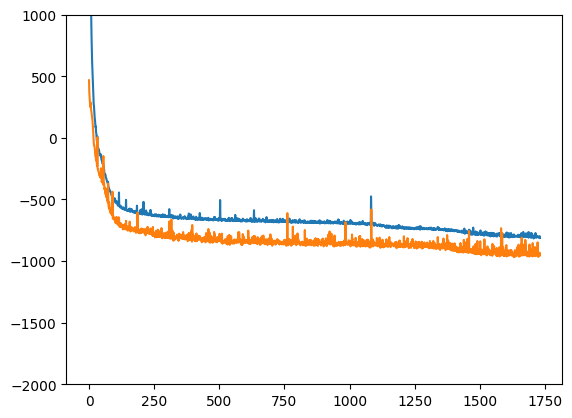

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


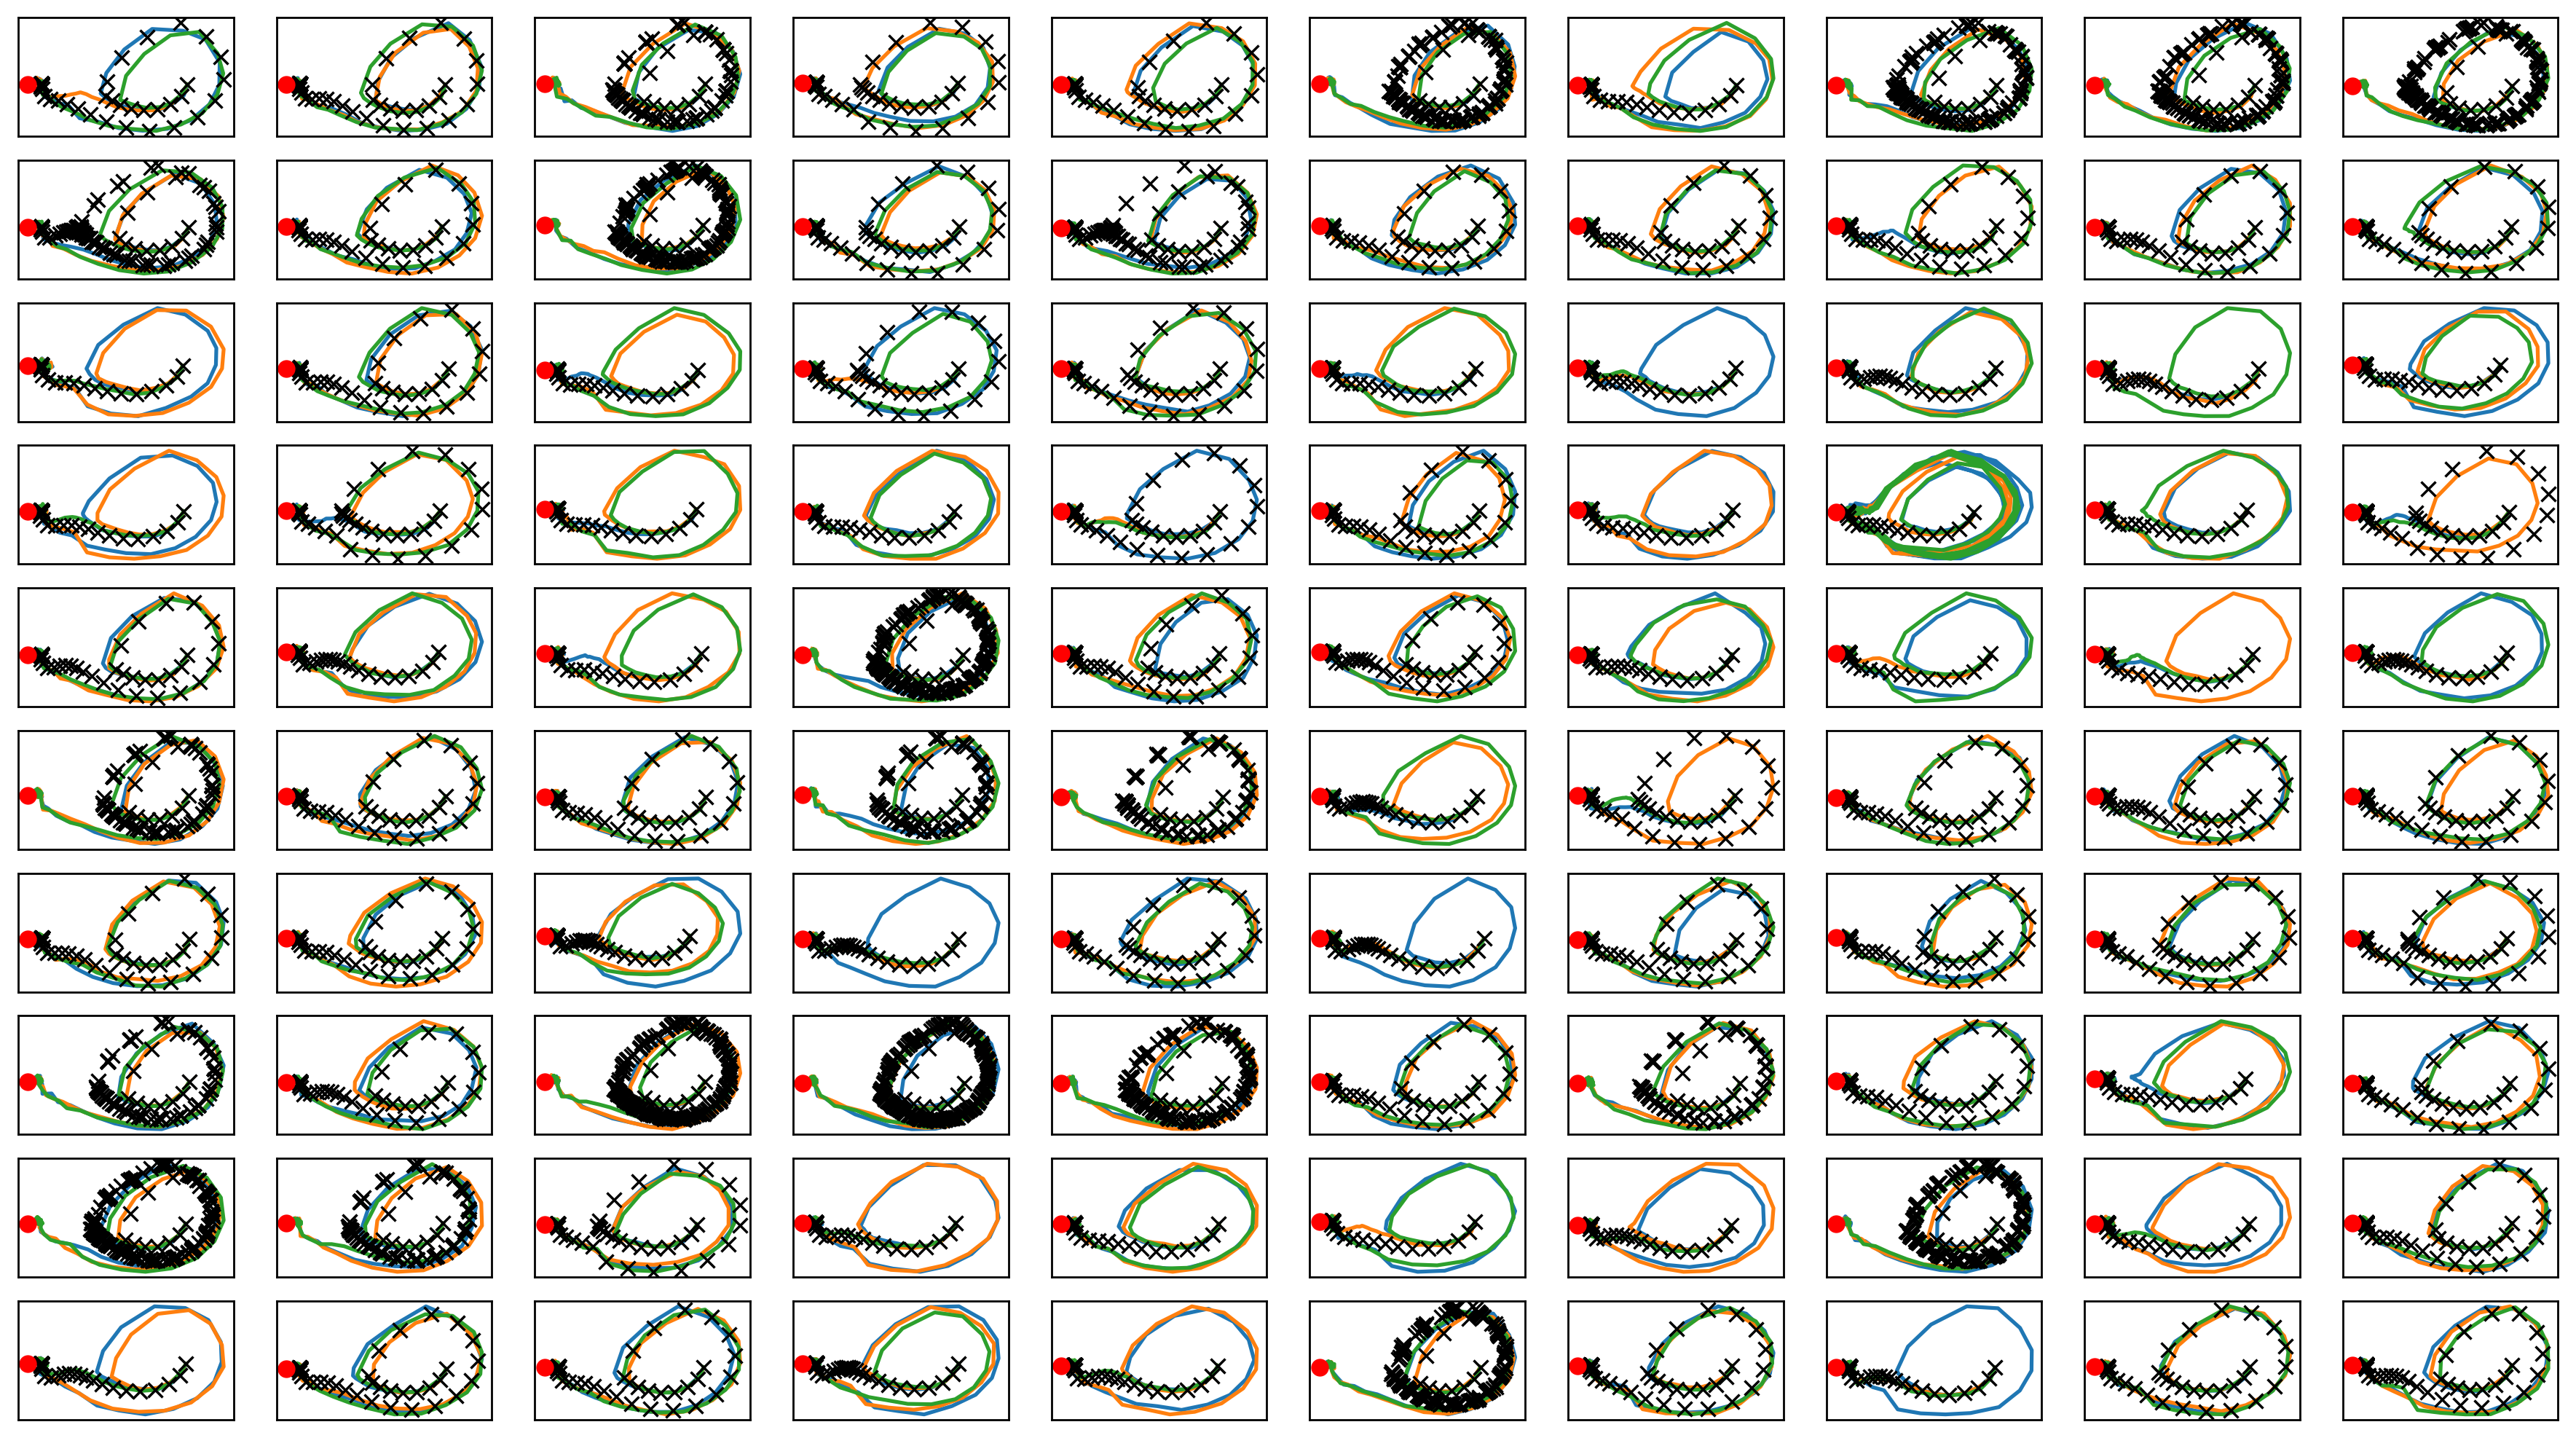

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

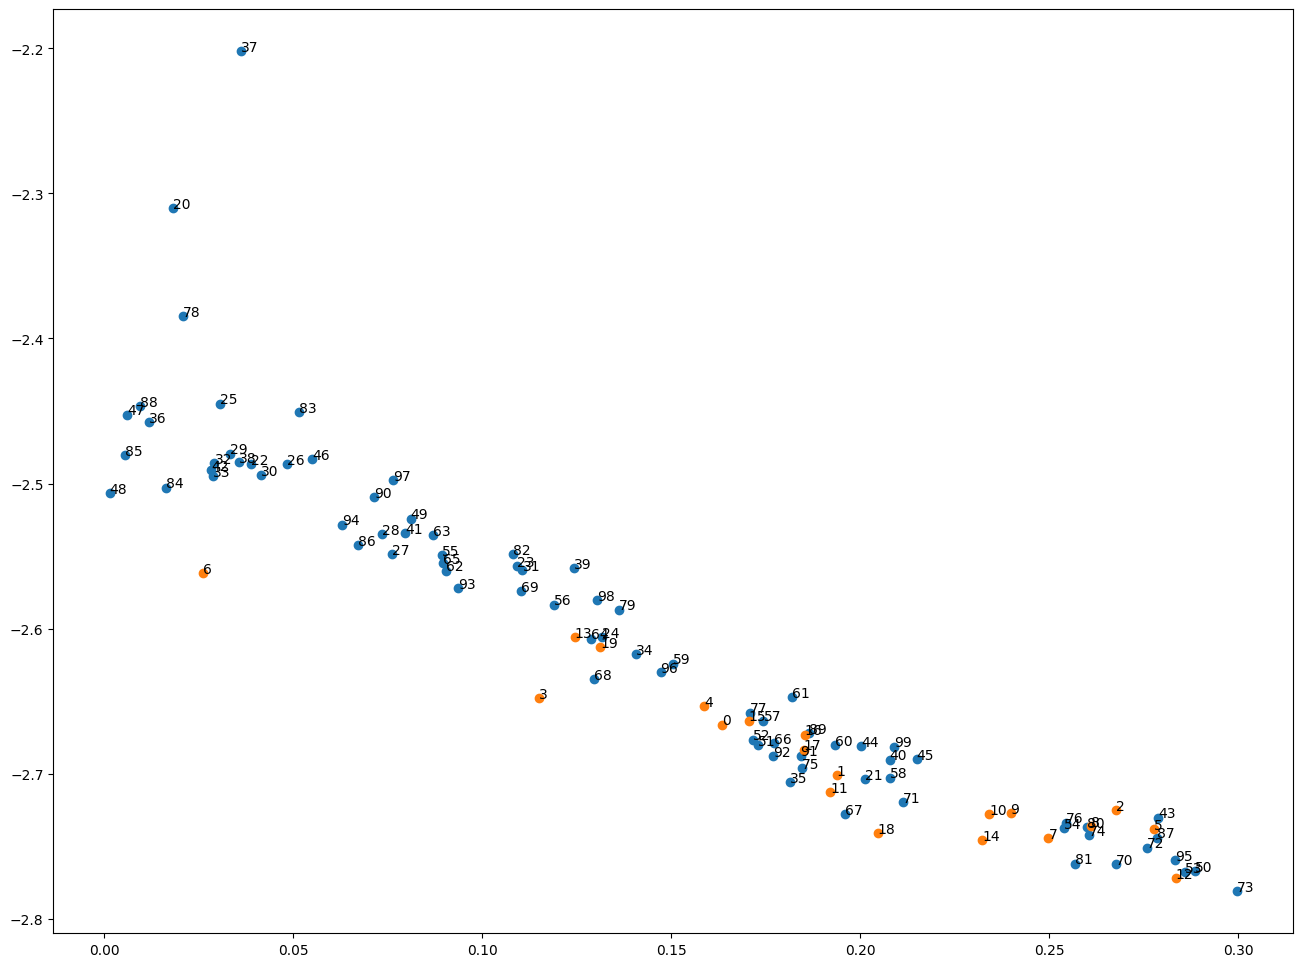

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


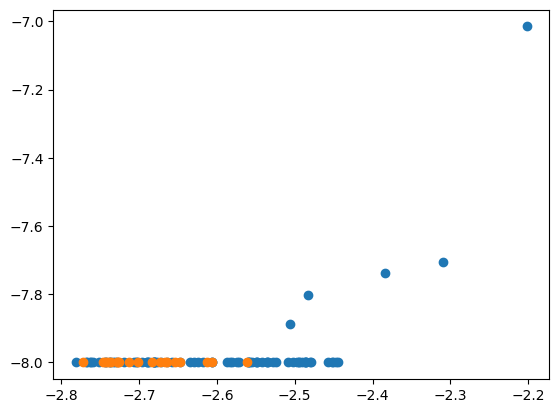

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 4.09573  validloss 4.53873±0.00000  bestvalidloss 4.53873  last_update 0
train: iter 1  trainloss 3.72720  validloss 4.10667±0.00000  bestvalidloss 4.10667  last_update 0
train: iter 2  trainloss 3.44241  validloss 3.77253±0.00000  bestvalidloss 3.77253  last_update 0
train: iter 3  trainloss 3.18508  validloss 3.47318±0.00000  bestvalidloss 3.47318  last_update 0
train: iter 4  trainloss 2.98570  validloss 3.24858±0.00000  bestvalidloss 3.24858  last_update 0
train: iter 5  trainloss 2.80227  validloss 3.03910±0.00000  bestvalidloss 3.03910  last_update 0
train: iter 6  trainloss 2.65976  validloss 2.87333±0.00000  bestvalidloss 2.87333  last_update 0
train: iter 7  trainloss 2.53456  validloss 2.72377±0.00000  bestvalidloss 2.72377  last_update 0
train: iter 8  trainloss 2.42522  validloss 2.60799±0.00000  bestvalidloss 2.60799  last_update 0
train: iter 9  trainloss 2.33307  validloss 2.49457±0.00000  bestvalidloss 2.49457  last_update 0
train: iter 10  trai

train: iter 85  trainloss -0.58513  validloss -0.56260±0.00000  bestvalidloss -0.56260  last_update 0
train: iter 86  trainloss -0.57087  validloss -0.60075±0.00000  bestvalidloss -0.60075  last_update 0
train: iter 87  trainloss -0.60997  validloss -0.62947±0.00000  bestvalidloss -0.62947  last_update 0
train: iter 88  trainloss -0.60817  validloss -0.63273±0.00000  bestvalidloss -0.63273  last_update 0
train: iter 89  trainloss -0.63443  validloss -0.63817±0.00000  bestvalidloss -0.63817  last_update 0
train: iter 90  trainloss -0.63983  validloss -0.68434±0.00000  bestvalidloss -0.68434  last_update 0
train: iter 91  trainloss -0.64977  validloss -0.67125±0.00000  bestvalidloss -0.68434  last_update 1
train: iter 92  trainloss -0.66244  validloss -0.68908±0.00000  bestvalidloss -0.68908  last_update 0
train: iter 93  trainloss -0.66791  validloss -0.71840±0.00000  bestvalidloss -0.71840  last_update 0
train: iter 94  trainloss -0.67780  validloss -0.73587±0.00000  bestvalidloss -0.7

train: iter 168  trainloss -0.72716  validloss -0.75933±0.00000  bestvalidloss -0.83573  last_update 36
train: iter 169  trainloss -0.74676  validloss -0.75659±0.00000  bestvalidloss -0.83573  last_update 37
train: iter 170  trainloss -0.70524  validloss -0.73702±0.00000  bestvalidloss -0.83573  last_update 38
train: iter 171  trainloss -0.71918  validloss -0.74564±0.00000  bestvalidloss -0.83573  last_update 39
train: iter 172  trainloss -0.73033  validloss -0.78818±0.00000  bestvalidloss -0.83573  last_update 40
train: iter 173  trainloss -0.72280  validloss -0.79397±0.00000  bestvalidloss -0.83573  last_update 41
train: iter 174  trainloss -0.71645  validloss -0.85081±0.00000  bestvalidloss -0.85081  last_update 0
train: iter 175  trainloss -0.70388  validloss -0.67564±0.00000  bestvalidloss -0.85081  last_update 1
train: iter 176  trainloss -0.71325  validloss -0.79048±0.00000  bestvalidloss -0.85081  last_update 2
train: iter 177  trainloss -0.76885  validloss -0.75793±0.00000  be

train: iter 258  trainloss -0.71525  validloss -0.76526±0.00000  bestvalidloss -0.85809  last_update 60
train: iter 259  trainloss -0.69962  validloss -0.75698±0.00000  bestvalidloss -0.85809  last_update 61
train: iter 260  trainloss -0.73471  validloss -0.80621±0.00000  bestvalidloss -0.85809  last_update 62
train: iter 261  trainloss -0.68773  validloss -0.77516±0.00000  bestvalidloss -0.85809  last_update 63
train: iter 262  trainloss -0.73468  validloss -0.81168±0.00000  bestvalidloss -0.85809  last_update 64
train: iter 263  trainloss -0.67447  validloss -0.71857±0.00000  bestvalidloss -0.85809  last_update 65
train: iter 264  trainloss -0.70409  validloss -0.80918±0.00000  bestvalidloss -0.85809  last_update 66
train: iter 265  trainloss -0.70944  validloss -0.76358±0.00000  bestvalidloss -0.85809  last_update 67
train: iter 266  trainloss -0.74242  validloss -0.77152±0.00000  bestvalidloss -0.85809  last_update 68
train: iter 267  trainloss -0.70310  validloss -0.78448±0.00000 

train: iter 340  trainloss -0.72271  validloss -0.70021±0.00000  bestvalidloss -0.89586  last_update 55
train: iter 341  trainloss -0.73398  validloss -0.75835±0.00000  bestvalidloss -0.89586  last_update 56
train: iter 342  trainloss -0.74122  validloss -0.76270±0.00000  bestvalidloss -0.89586  last_update 57
train: iter 343  trainloss -0.69704  validloss -0.79515±0.00000  bestvalidloss -0.89586  last_update 58
train: iter 344  trainloss -0.76555  validloss -0.80329±0.00000  bestvalidloss -0.89586  last_update 59
train: iter 345  trainloss -0.73716  validloss -0.79362±0.00000  bestvalidloss -0.89586  last_update 60
train: iter 346  trainloss -0.67226  validloss -0.69492±0.00000  bestvalidloss -0.89586  last_update 61
train: iter 347  trainloss -0.73052  validloss -0.81596±0.00000  bestvalidloss -0.89586  last_update 62
train: iter 348  trainloss -0.71784  validloss -0.81008±0.00000  bestvalidloss -0.89586  last_update 63
train: iter 349  trainloss -0.72110  validloss -0.72870±0.00000 

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-2.5975, -4.2962], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 13.83902  validloss 22.34368±0.00000  bestvalidloss 22.34368  last_update 0
train: iter 1  trainloss 7.12775  validloss 11.26799±0.00000  bestvalidloss 11.26799  last_update 0
train: iter 2  trainloss 4.54757  validloss 5.14649±0.00000  bestvalidloss 5.14649  last_update 0
train: iter 3  trainloss 3.80812  validloss 3.12776±0.00000  bestvalidloss 3.12776  last_update 0
train: iter 4  trainloss 3.44083  validloss 2.18255±0.00000  bestvalidloss 2.18255  last_update 0
train: iter 5  trainloss 3.29597  validloss 1.78350±0.00000  bestvalidloss 1.78350  last_update 0
train: iter 6  trainloss 3.18567  validloss 1.59390±0.00000  bestvalidloss 1.59390  last_update 0
train: iter 7  trainloss 3.03946  validloss 1.51265±0.00000  bestvalidloss 1.51265  last_update 0
train: iter 8  trainloss 2.93486  validloss 1.39638±0.00000  bestvalidloss 1.39638  last_update 0
train: iter 9  trainloss 2.89117  validloss 1.36590±0.00000  bestvalidloss 1.36590  last_update 0
train: iter 10 

train: iter 84  trainloss 2.19478  validloss 1.04647±0.00000  bestvalidloss 0.92234  last_update 21
train: iter 85  trainloss 2.25171  validloss 1.03433±0.00000  bestvalidloss 0.92234  last_update 22
train: iter 86  trainloss 2.15425  validloss 0.96586±0.00000  bestvalidloss 0.92234  last_update 23
train: iter 87  trainloss 2.17611  validloss 0.91842±0.00000  bestvalidloss 0.91842  last_update 0
train: iter 88  trainloss 2.21642  validloss 0.99311±0.00000  bestvalidloss 0.91842  last_update 1
train: iter 89  trainloss 2.12866  validloss 0.92756±0.00000  bestvalidloss 0.91842  last_update 2
train: iter 90  trainloss 2.20579  validloss 1.19358±0.00000  bestvalidloss 0.91842  last_update 3
train: iter 91  trainloss 2.22388  validloss 0.93920±0.00000  bestvalidloss 0.91842  last_update 4
train: iter 92  trainloss 2.18573  validloss 0.98026±0.00000  bestvalidloss 0.91842  last_update 5
train: iter 93  trainloss 2.19582  validloss 0.91130±0.00000  bestvalidloss 0.91130  last_update 0
train: 

train: iter 166  trainloss 2.08716  validloss 0.91861±0.00000  bestvalidloss 0.85058  last_update 1
train: iter 167  trainloss 2.06801  validloss 0.92598±0.00000  bestvalidloss 0.85058  last_update 2
train: iter 168  trainloss 2.09139  validloss 0.93565±0.00000  bestvalidloss 0.85058  last_update 3
train: iter 169  trainloss 2.09096  validloss 0.95067±0.00000  bestvalidloss 0.85058  last_update 4
train: iter 170  trainloss 2.08926  validloss 0.94972±0.00000  bestvalidloss 0.85058  last_update 5
train: iter 171  trainloss 2.09867  validloss 0.98476±0.00000  bestvalidloss 0.85058  last_update 6
train: iter 172  trainloss 2.10350  validloss 0.90261±0.00000  bestvalidloss 0.85058  last_update 7
train: iter 173  trainloss 2.09119  validloss 1.07714±0.00000  bestvalidloss 0.85058  last_update 8
train: iter 174  trainloss 2.06333  validloss 0.89846±0.00000  bestvalidloss 0.85058  last_update 9
train: iter 175  trainloss 2.14553  validloss 0.92964±0.00000  bestvalidloss 0.85058  last_update 10

train: iter 248  trainloss 2.03133  validloss 0.83423±0.00000  bestvalidloss 0.83264  last_update 23
train: iter 249  trainloss 1.98579  validloss 0.83748±0.00000  bestvalidloss 0.83264  last_update 24
train: iter 250  trainloss 2.00151  validloss 0.93322±0.00000  bestvalidloss 0.83264  last_update 25
train: iter 251  trainloss 1.98389  validloss 0.86285±0.00000  bestvalidloss 0.83264  last_update 26
train: iter 252  trainloss 1.96885  validloss 0.90461±0.00000  bestvalidloss 0.83264  last_update 27
train: iter 253  trainloss 1.93878  validloss 0.86900±0.00000  bestvalidloss 0.83264  last_update 28
train: iter 254  trainloss 2.08078  validloss 0.94534±0.00000  bestvalidloss 0.83264  last_update 29
train: iter 255  trainloss 1.99582  validloss 0.84423±0.00000  bestvalidloss 0.83264  last_update 30
train: iter 256  trainloss 1.99721  validloss 0.95533±0.00000  bestvalidloss 0.83264  last_update 31
train: iter 257  trainloss 2.00175  validloss 0.81913±0.00000  bestvalidloss 0.81913  last_

train: iter 330  trainloss 1.92280  validloss 0.85019±0.00000  bestvalidloss 0.78914  last_update 4
train: iter 331  trainloss 2.04694  validloss 0.88071±0.00000  bestvalidloss 0.78914  last_update 5
train: iter 332  trainloss 1.92992  validloss 0.88046±0.00000  bestvalidloss 0.78914  last_update 6
train: iter 333  trainloss 1.94086  validloss 0.83763±0.00000  bestvalidloss 0.78914  last_update 7
train: iter 334  trainloss 1.92721  validloss 0.80395±0.00000  bestvalidloss 0.78914  last_update 8
train: iter 335  trainloss 1.96136  validloss 0.94528±0.00000  bestvalidloss 0.78914  last_update 9
train: iter 336  trainloss 2.02345  validloss 0.92148±0.00000  bestvalidloss 0.78914  last_update 10
train: iter 337  trainloss 1.99188  validloss 0.89827±0.00000  bestvalidloss 0.78914  last_update 11
train: iter 338  trainloss 1.98300  validloss 0.88744±0.00000  bestvalidloss 0.78914  last_update 12
train: iter 339  trainloss 2.01551  validloss 0.85212±0.00000  bestvalidloss 0.78914  last_update

train: iter 412  trainloss 1.99525  validloss 0.83220±0.00000  bestvalidloss 0.78103  last_update 49
train: iter 413  trainloss 1.92256  validloss 0.87142±0.00000  bestvalidloss 0.78103  last_update 50
train: iter 414  trainloss 1.92385  validloss 0.84285±0.00000  bestvalidloss 0.78103  last_update 51
train: iter 415  trainloss 2.00364  validloss 0.92517±0.00000  bestvalidloss 0.78103  last_update 52
train: iter 416  trainloss 1.98979  validloss 0.93109±0.00000  bestvalidloss 0.78103  last_update 53
train: iter 417  trainloss 1.95316  validloss 0.83425±0.00000  bestvalidloss 0.78103  last_update 54
train: iter 418  trainloss 2.10938  validloss 0.87326±0.00000  bestvalidloss 0.78103  last_update 55
train: iter 419  trainloss 1.94418  validloss 0.89028±0.00000  bestvalidloss 0.78103  last_update 56
train: iter 420  trainloss 2.00561  validloss 0.97180±0.00000  bestvalidloss 0.78103  last_update 57
train: iter 421  trainloss 1.94326  validloss 0.88723±0.00000  bestvalidloss 0.78103  last_

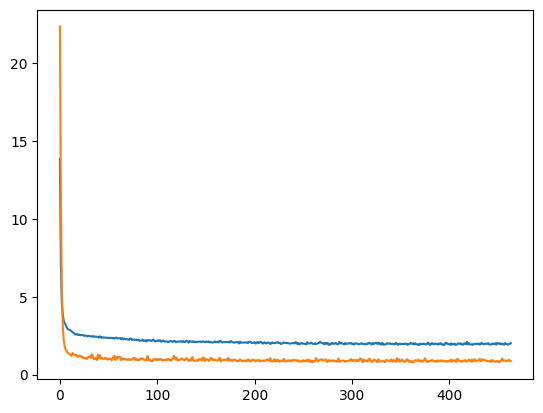

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-6.8937)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(1.0739)


In [21]:
print(vi.h_min_tilde)

-5.841996


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.06073291927484808
tensor([-0.3818])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

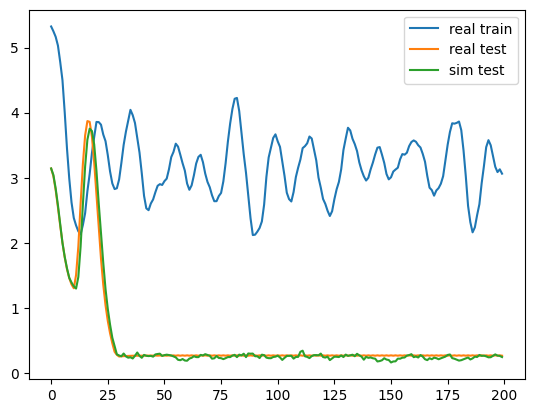

encoder [-2.612812 -8.      ]
initial_belief tensor([-2.5975, -4.2962])
real train tensor([-2.6088, -8.0128])
real test tensor([-2.7834, -8.0146])
sim tensor([-2.5941, -4.3133])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-2.5510204081632657


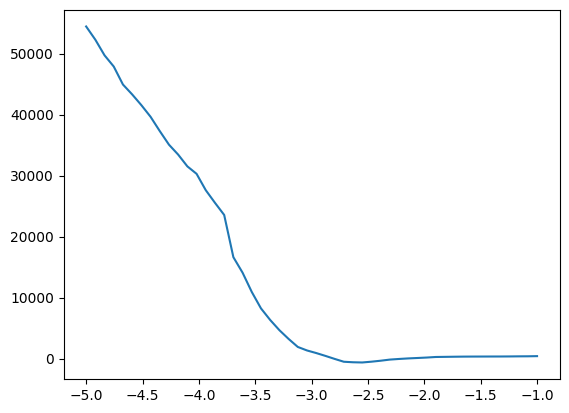

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.2441077770411253
tensor([0.2373])
